In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import load_model

### Question 1

In [2]:
model = load_model('bees-wasps.h5', compile=False)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\chunh\AppData\Local\Temp\tmpyw8s5b92\assets


INFO:tensorflow:Assets written to: C:\Users\chunh\AppData\Local\Temp\tmpyw8s5b92\assets


In [3]:
file_size = os.path.getsize('converted_model.tflite')

print(f"Size of the converted model: {file_size / (1024 * 1024):.2f} MB")

Size of the converted model: 42.79 MB


### Question 2

In [4]:
interpreter = tf.lite.Interpreter(model_path='converted_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

output_index = output_details[0]['index']

print("Output index:", output_index)

Output index: 13


### Question 3

In [5]:
def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

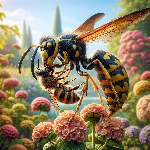

In [6]:
image_path = 'image.jpeg'
img = Image.open(image_path)

target_size = (150, 150)

prepared_img = prepare_image(img, target_size)
prepared_img

In [7]:
img_array = np.array(prepared_img)
img_array = img_array / 255.0
r_channel_value = img_array[0, 0, 0]

print(f"R channel value of the first pixel: {r_channel_value:.5f}")

R channel value of the first pixel: 0.94510


### Question 4

In [8]:
# Reshape the input tensor to match the model's input shape
input_shape = input_details[0]['shape']
input_data = np.expand_dims(img_array, axis=0).astype(input_details[0]['dtype'])

# Set the input tensor values
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print the output
print("Output of the model:", output_data)

Output of the model: [[0.6592137]]


### Question 5

In [9]:
!docker pull agrigorev/zoomcamp-bees-wasps:v2

v2: Pulling from agrigorev/zoomcamp-bees-wasps
Digest: sha256:823f8536a45968f40ee3daf8a2da030b914912a382a4611610b3b84d36d2924c
Status: Image is up to date for agrigorev/zoomcamp-bees-wasps:v2
docker.io/agrigorev/zoomcamp-bees-wasps:v2



What's Next?
  View a summary of image vulnerabilities and recommendations â†’ docker scout quickview agrigorev/zoomcamp-bees-wasps:v2


In [10]:
!docker images --filter "reference=agrigorev/zoomcamp-bees-wasps" 

REPOSITORY                      TAG       IMAGE ID       CREATED      SIZE
agrigorev/zoomcamp-bees-wasps   v2        b9f6c13de368   8 days ago   662MB


### Question 6

In [11]:
!docker build -t mlzoomcampwkt9:project .

#0 building with "default" instance using docker driver

#1 [internal] load .dockerignore
#1 transferring context: 2B 0.0s done
#1 DONE 0.1s

#2 [internal] load build definition from Dockerfile
#2 transferring dockerfile: 376B 0.0s done
#2 DONE 0.1s

#3 [internal] load metadata for docker.io/agrigorev/zoomcamp-bees-wasps:v2
#3 DONE 0.0s

#4 [1/4] FROM docker.io/agrigorev/zoomcamp-bees-wasps:v2
#4 DONE 0.0s

#5 [internal] load build context
#5 transferring context: 40B done
#5 DONE 0.0s

#6 [2/4] RUN pip install keras-image-helper numpy tensorflow Pillow
#6 CACHED

#7 [3/4] RUN pip install https://github.com/alexeygrigorev/tflite-aws-lambda/raw/main/tflite/tflite_runtime-2.14.0-cp310-cp310-linux_x86_64.whl
#7 CACHED

#8 [4/4] COPY lambda_function.py .
#8 CACHED

#9 exporting to image
#9 exporting layers done
#9 writing image sha256:e513cca8fc7e7a5b2b2702ecc1014ba609cf2a048a1aa6b35233ea0403fe0b27 done
#9 naming to docker.io/library/mlzoomcampwkt9:project done
#9 DONE 0.0s

What's Next?
 

In [12]:
#!winpty docker run -it -p 8000:8000 mlzoomcampwkt9:project

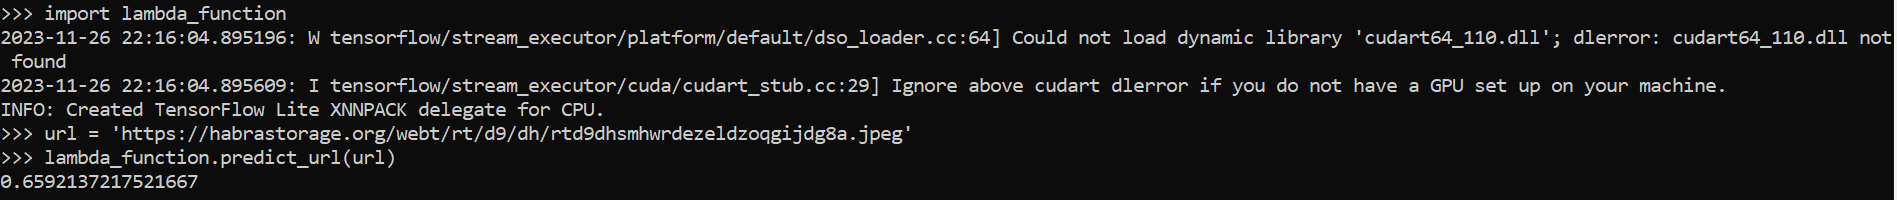

In [13]:
# import requests
# url = 'http://localhost:8080/2015-03-31/functions/function/invocations'

# data = {'url': 'https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg'}
# result = requests.post(url, json=data).json()
# print(result)